In [21]:
from lxml import etree
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics


In [9]:
def plot_froc_curve(positive_sco_file, negative_sco_file, legend):
    # Read the positive sco file
    positive_data = pd.read_csv(positive_sco_file, delimiter='\t', header=None, skiprows=1)
    positive_scores = positive_data.iloc[:, 1].values

    # Read the negative sco file
    negative_data = pd.read_csv(negative_sco_file, delimiter='\t', header=None, skiprows=1)
    negative_scores = negative_data.iloc[:, 1].values

    # Combine positive and negative scores
    scores = np.concatenate((positive_scores, negative_scores))
    labels = np.concatenate((np.ones_like(positive_scores), np.zeros_like(negative_scores)))

    # Sort the scores in descending order
    sorted_indices = np.argsort(scores)[::-1]
    sorted_scores = scores[sorted_indices]
    sorted_labels = labels[sorted_indices]

    # Calculate sensitivity and average FPPI
    tpr = np.cumsum(sorted_labels) / np.sum(sorted_labels)
    fppi = np.cumsum(1 - sorted_labels) / len(negative_scores)

    # Plot the FROC curve with red color and thinner line
    plt.plot(fppi, tpr, marker='o', color='red', linewidth=1)
    plt.xlabel('Average Number of False Positives per Image')
    plt.ylabel('Sensitivity')
    plt.title('Free-Response Receiver Operating Characteristic (FROC) Curve')
    plt.grid(True)

    # Add legend
    label_text = legend
    plt.legend([label_text], loc='lower right')

    plt.show()

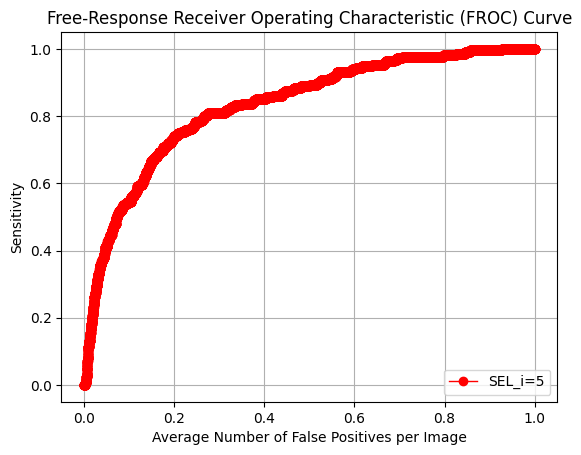

In [10]:
positive_file_path = r'../dataset/ml_runs/run1/SVM_SEL_5/10-fold-pos.SEL(005).sco'
negative_file_path = r'../dataset/ml_runs/run1/SVM_SEL_5/10-fold-neg.SEL(005).sco'

plot_froc_curve(positive_file_path, negative_file_path, legend='SEL_i=5')


Plotting more than one curve

In [27]:
def plot_froc_curves(positive_files, negative_files, colors, legends):
    plt.figure()

    for i in range(len(positive_files)):
        positive_file = positive_files[i]
        negative_file = negative_files[i]
        color = colors[i]
        legend = legends[i]

        # Read the positive sco file
        positive_data = pd.read_csv(positive_file, delimiter='\t', header=None, skiprows=1)
        positive_scores = positive_data.iloc[:, 1].values

        # Read the negative sco file
        negative_data = pd.read_csv(negative_file, delimiter='\t', header=None, skiprows=1)
        negative_scores = negative_data.iloc[:, 1].values

        # Combine positive and negative scores
        scores = np.concatenate((positive_scores, negative_scores))
        labels = np.concatenate((np.ones_like(positive_scores), np.zeros_like(negative_scores)))

        # Sort the scores in descending order
        sorted_indices = np.argsort(scores)[::-1]
        sorted_scores = scores[sorted_indices]
        sorted_labels = labels[sorted_indices]

        # Calculate sensitivity and average FPPI
        tpr = np.cumsum(sorted_labels) / np.sum(sorted_labels)
        fppi = np.cumsum(1 - sorted_labels) / len(negative_scores)

        # Calculate AUC
        auc = metrics.auc(fppi, tpr)

        # Plot the FROC curve
        plt.plot(fppi, tpr, marker='o', color=color, linewidth=1, label=f'{legend} (AUC: {auc:.2f})')

    plt.xlabel('Average Number of False Positives per Image')
    plt.ylabel('Sensitivity')
    plt.title('Free-Response Receiver Operating Characteristic (FROC) Curves')
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.show()

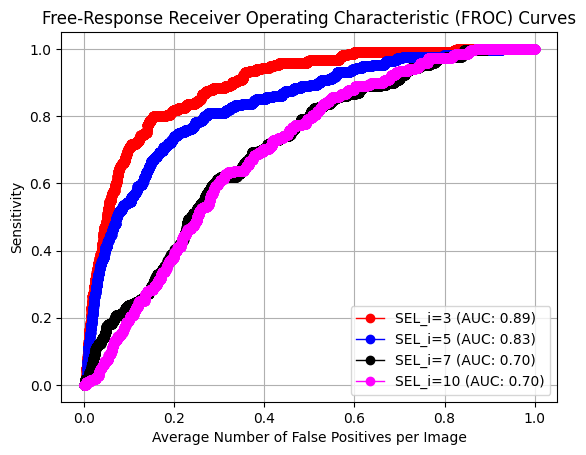

In [29]:
positive_files = ['../dataset/ml_runs/run1/SVM_SEL_3/10-fold-pos.SEL(003).sco', 
                  '../dataset/ml_runs/run1/SVM_SEL_5/10-fold-pos.SEL(005).sco',
                 '../dataset/ml_runs/run1/SVM_SEL_7/10-fold-pos.SEL(007).sco',
                 '../dataset/ml_runs/run1/SVM_SEL_10/10-fold-pos.SEL(010).sco']  # List of positive file paths

negative_files = ['../dataset/ml_runs/run1/SVM_SEL_3/10-fold-neg.SEL(003).sco', 
                  '../dataset/ml_runs/run1/SVM_SEL_5/10-fold-neg.SEL(005).sco',
                  '../dataset/ml_runs/run1/SVM_SEL_7/10-fold-neg.SEL(007).sco',
                  '../dataset/ml_runs/run1/SVM_SEL_10/10-fold-neg.SEL(010).sco']  # List of negative file paths

colors = ['red', 'blue', 'black', 'magenta']  # List of colors for each curve
legends = ['SEL_i=3', 'SEL_i=5', 'SEL_i=7', 'SEL_i=10']  # List of legends for each curve

plot_froc_curves(positive_files, negative_files, colors, legends)
